
<h1 align=center><font size = 5>Introduction to Statistics With Python   </font></h1>

# Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Using summary statistics to better understand Indian startup funding  </a></li>




</div>



For more  Data science and Statistics check out <a href= "https://cognitiveclass.ai/courses/data-analysis-python">Data Analysis wit Python</a> for Free! 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
%matplotlib inline

 Function used to plot area under normal curve 

In [2]:
def Plot_Normal(mu,sigma,x1,x2,c='b'):
    
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    N=x.shape
    y=mlab.normpdf(x, mu, sigma);
    plt.plot(x,y,c)

    y3=np.zeros(N)
    y4=np.zeros(N)
    y4[(x>x1) & (x<x2)]=y[(x>x1) & (x<(x2))]
    plt.fill_between(x, y3, y4, color='grey', alpha='0.5')
    plt.show()

## <a id="ref0"></a> Using summary statistics to better understand Indian startup funding 

 It's difficult to deal with large datasets, in this notebook we will use statistical methods to better understand the data. This dataset provides information about  2372 Indian startups from January 2015 to August 2017. The dataset includes columns with the date funded, the city the startup is based out of, the names of the funders,  the amount invested (in USD) and other information. The dataset is from Sudalai Rajkumar.


 Let's load the data, using the function **read_csv**. The first column of the dataset contains an index, so we set the parameter  
** index_col=0**.


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/jsantarc/ADMN5016_2022/master/data/startup_funding.csv',index_col=0)

In [7]:
df.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
SNo,,,,,,,,,
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


We can find the shape of the dataset; there are 2378 samples and nine columns.

In [8]:
df.shape

(2372, 9)

We can find the type of data for each column using the attribute  **dtype**.

In [9]:
df.dtypes

Date                object
StartupName         object
IndustryVertical    object
SubVertical         object
CityLocation        object
InvestorsName       object
InvestmentType      object
AmountInUSD         object
Remarks             object
dtype: object

 The column **AmountInUSD**  is of type  object, we must convert it into a numeric type. If we convert the type using the following command, we will get an error as there is a comma in the dollar amounts.

In [12]:
#df['AmountInUSD']=df['AmountInUSD'].astype(float)
df['AmountInUSD'].str

We use the  **str.replace(',','')** method to replace the comma with a space, then cast the value to a float.

In [13]:
df['AmountInUSD']=df['AmountInUSD'].str.replace(',','').astype(float)


 We can see the type of **AmountInUSD** is now **float64**:

In [14]:
df.dtypes

Date                 object
StartupName          object
IndustryVertical     object
SubVertical          object
CityLocation         object
InvestorsName        object
InvestmentType       object
AmountInUSD         float64
Remarks              object
dtype: object

 We can count the number of null values in each column as follows:

In [15]:
df.apply(lambda x: x.isnull().values.sum())

Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64


As our primary concern is how factors affect the amount invested, we will drop all rows that do not contain data about the amount invested.

In [16]:
df=df[df['AmountInUSD'].notnull()]
df.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
SNo,,,,,,,,,
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN
5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,1000000.0,NaN
6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,2600000.0,NaN


If we check the shape of the dataframe, we see we lost 847 rows.

In [17]:
df.shape

(1525, 9)

 We can plot the investments over time:

<Figure size 7200x7200 with 0 Axes>

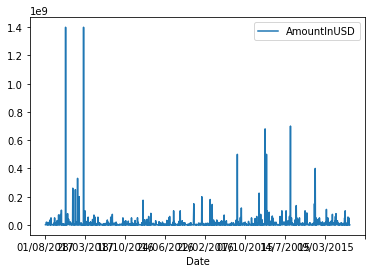

In [18]:
plt.figure(figsize=(100,100))
df.plot(x='Date', y='AmountInUSD')
plt.show()

We can calculate the mean:

In [19]:
df['AmountInUSD'].mean()

12031073.099016393

 We can calculate the median:

In [20]:
df['AmountInUSD'].median()

1070000.0

 The large difference between mean and median suggests there are a lot of outliers. The  standard deviation also suggests the data is spread out:

In [21]:
df['AmountInUSD'].std()

64031175.12873626

 We can use the method **describe()** to view more summary statistics; it's interesting to study the quartiles:  

In [22]:
df.describe()

,AmountInUSD
count,1.525000e+03
mean,1.203107e+07
std,6.403118e+07
min,1.600000e+04
25%,3.700000e+05
50%,1.070000e+06
75%,6.000000e+06
max,1.400000e+09


A box plot is not very useful:

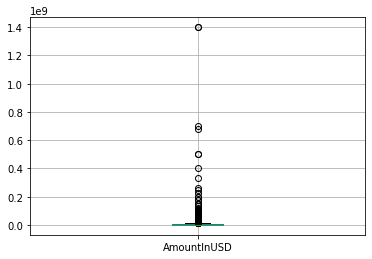

In [23]:
df.boxplot('AmountInUSD')
plt.show()

 Examining the histogram, we can see the data is definitely not normally distributed:

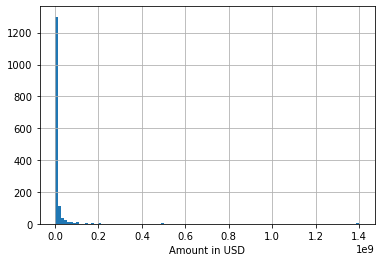

In [24]:
df['AmountInUSD'].hist(bins=100)
plt.xlabel('Amount in USD')
plt.show()

 We can verify using a Q–Q plot (quantile-quantile plot):

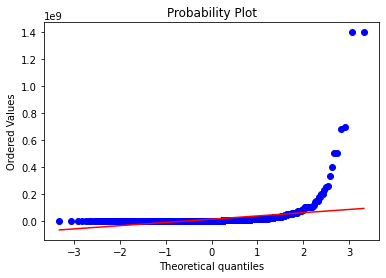

In [25]:
stats.probplot(df['AmountInUSD'], dist="norm", plot=pylab)
pylab.show()

 As expected the data does not fall in a straight line. Therefore it is not normally distributed. 

Let's look at the categorical variables:

In [26]:
df.drop(labels=['AmountInUSD','Date'],axis=1).describe(include='all')

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,Remarks
count,1525,1394,871,1390,1520,1525,341
unique,1320,515,835,52,1232,7,50
top,Swiggy,Consumer Internet,Online Pharmacy,Bangalore,Undisclosed Investors,Private Equity,Series A
freq,7,461,4,405,24,827,152


 Let's look at the top values in the column **IndustryVertical**:

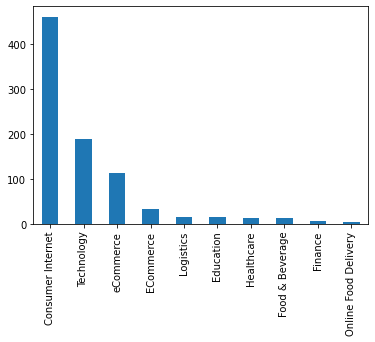

In [27]:
df['IndustryVertical'].value_counts()[0:10].plot(kind='bar')
plt.show()

 Let's look at the average investment  in each city

<AxesSubplot:xlabel='CityLocation'>

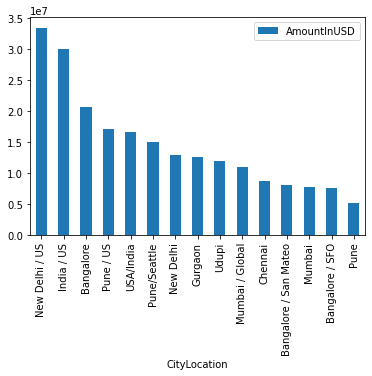

In [28]:
df.groupby(['CityLocation'])[['AmountInUSD']].mean().sort_values('AmountInUSD',ascending=False)[0:15].plot(kind='bar')


In [31]:
list(df)

['Date',
 'StartupName',
 'IndustryVertical',
 'SubVertical',
 'CityLocation',
 'InvestorsName',
 'InvestmentType',
 'AmountInUSD',
 'Remarks']

 We can examine  how each of the other columns affects average investment:

IndustryVertical
SubVertical
CityLocation
InvestorsName
InvestmentType


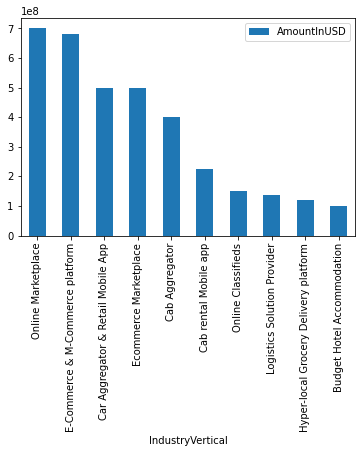

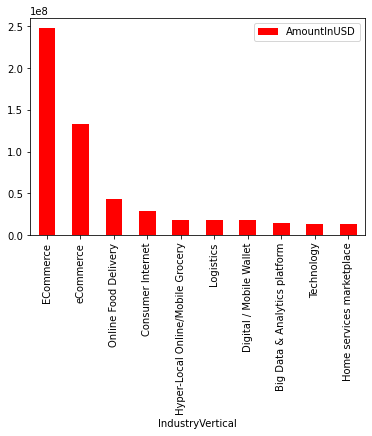

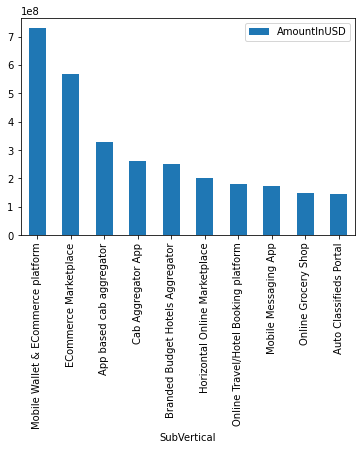

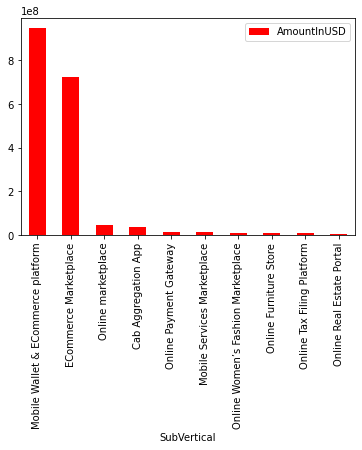

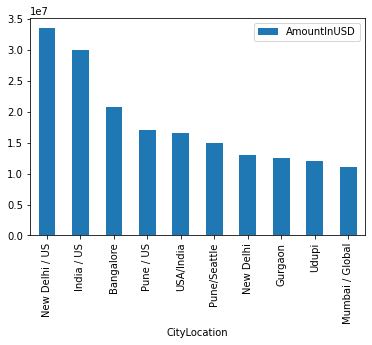

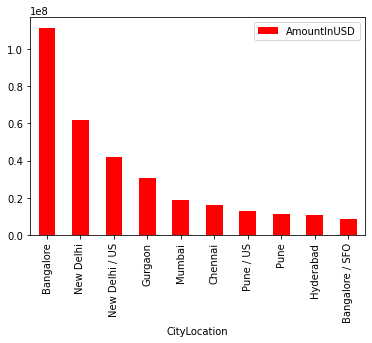

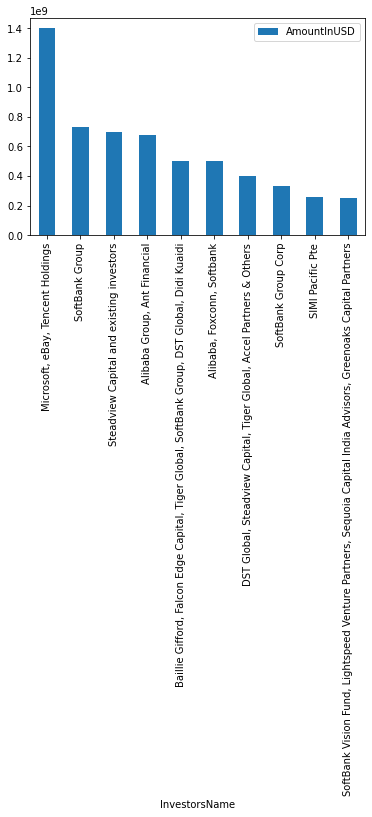

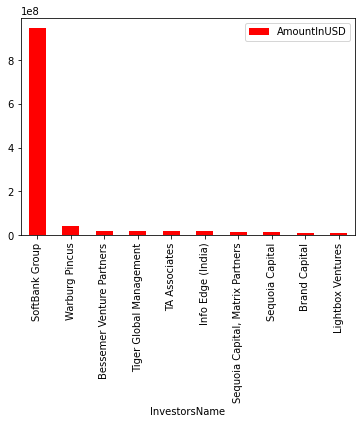

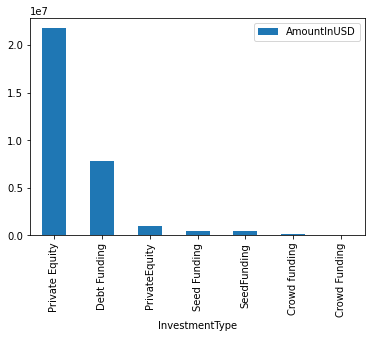

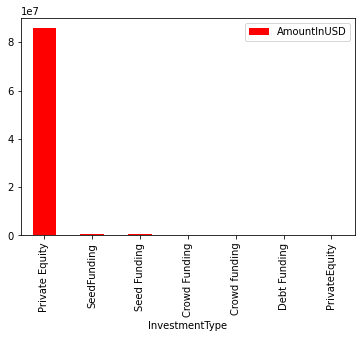

In [33]:
for name in list(df)[2:-2]:
    print(name)

    df.groupby(name)[['AmountInUSD']].mean().sort_values('AmountInUSD',ascending=False)[0:10].plot(kind='bar')
    df.groupby(name)[['AmountInUSD']].std().sort_values('AmountInUSD',ascending=False)[0:10].plot(kind='bar',color='red')    

### About the Authors:  

[Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Copyright &copy; 2018 [Cognitive Class](https://cognitiveclass.ai/). This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).